In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import joblib

In [2]:
cols_data = ["id", "title", "genre", "description"]
train_df=pd.read_csv("train_data.txt", sep=" ::: ", names=cols_data, engine="python")
train_df.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [3]:
cols_test = ["id", "title", "description"]
test_df=pd.read_csv("test_data.txt", sep=" ::: ", names=cols_test, engine="python")
test_df.head()

,id,title,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...


In [4]:
test_soln_df=pd.read_csv("test_data_solution.txt", sep=" ::: ", names=cols_data, engine="python")
test_soln_df.head()

,id,title,genre,description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


In [5]:
encoded_genre_train = LabelEncoder().fit_transform(train_df["genre"])
encoded_genre_train

array([ 8, 24,  1, ...,  7,  5, 12])

In [6]:
encoded_genre_test = LabelEncoder().fit_transform(test_soln_df["genre"])
encoded_genre_test

array([24,  5,  7, ...,  1,  8,  8])

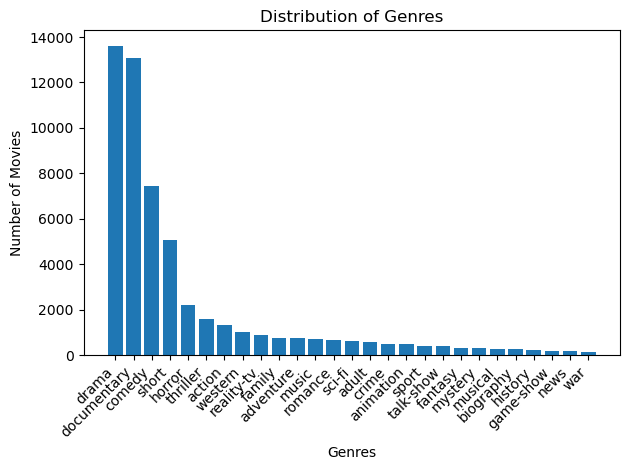

In [7]:
genre_counts = train_df['genre'].value_counts()

plt.figure()
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Distribution of Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [8]:
%%time

train_temp = [str(t) for t in train_df["description"]]
train_title = TfidfVectorizer(max_features=1000).fit_transform(train_df["title"])
train_desc = TfidfVectorizer(max_features=3000).fit_transform(train_temp)

CPU times: total: 8.36 s
Wall time: 8.64 s


In [9]:
%%time

test_temp = [str(t) for t in test_df["description"]]
test_title = TfidfVectorizer(max_features=1000).fit_transform(test_df["title"])
test_desc = TfidfVectorizer(max_features=3000).fit_transform(test_temp)

CPU times: total: 8.19 s
Wall time: 8.21 s


In [10]:
%%time

x_train = np.hstack((train_title.toarray(), train_desc.toarray()))
x_test = np.hstack((test_title.toarray(), test_desc.toarray()))
y_train = encoded_genre_train
y_test = encoded_genre_test
len(y_test)

CPU times: total: 18.7 s
Wall time: 29.6 s


54200

# Gaussian Naive Bayes

In [11]:
%%time

gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

CPU times: total: 24.8 s
Wall time: 44 s


GaussianNB()

In [12]:
%%time

y_pred_gnb = gnb_model.predict(x_test)
len(y_pred_gnb)

CPU times: total: 9min 45s
Wall time: 30min 16s


54200

In [13]:
accuracy = accuracy_score(y_test, y_pred_gnb)
accuracy

0.1640590405904059

In [14]:
print(classification_report(y_test, y_pred_gnb, zero_division=1))

              precision    recall  f1-score   support

           0       0.03      0.03      0.03      1314
           1       0.00      0.00      0.00       590
           2       0.02      0.04      0.02       775
           3       0.03      0.00      0.01       498
           4       0.00      0.00      0.00       264
           5       0.20      0.23      0.21      7446
           6       0.00      0.00      0.00       505
           7       0.42      0.23      0.30     13096
           8       0.31      0.16      0.21     13612
           9       0.02      0.10      0.04       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.07      0.05      0.06      2204
          14       0.02      0.01      0.01       731
          15       0.01      0.00      0.01       276
          16       0.00      0.00      0.00       318
          17       1.00    

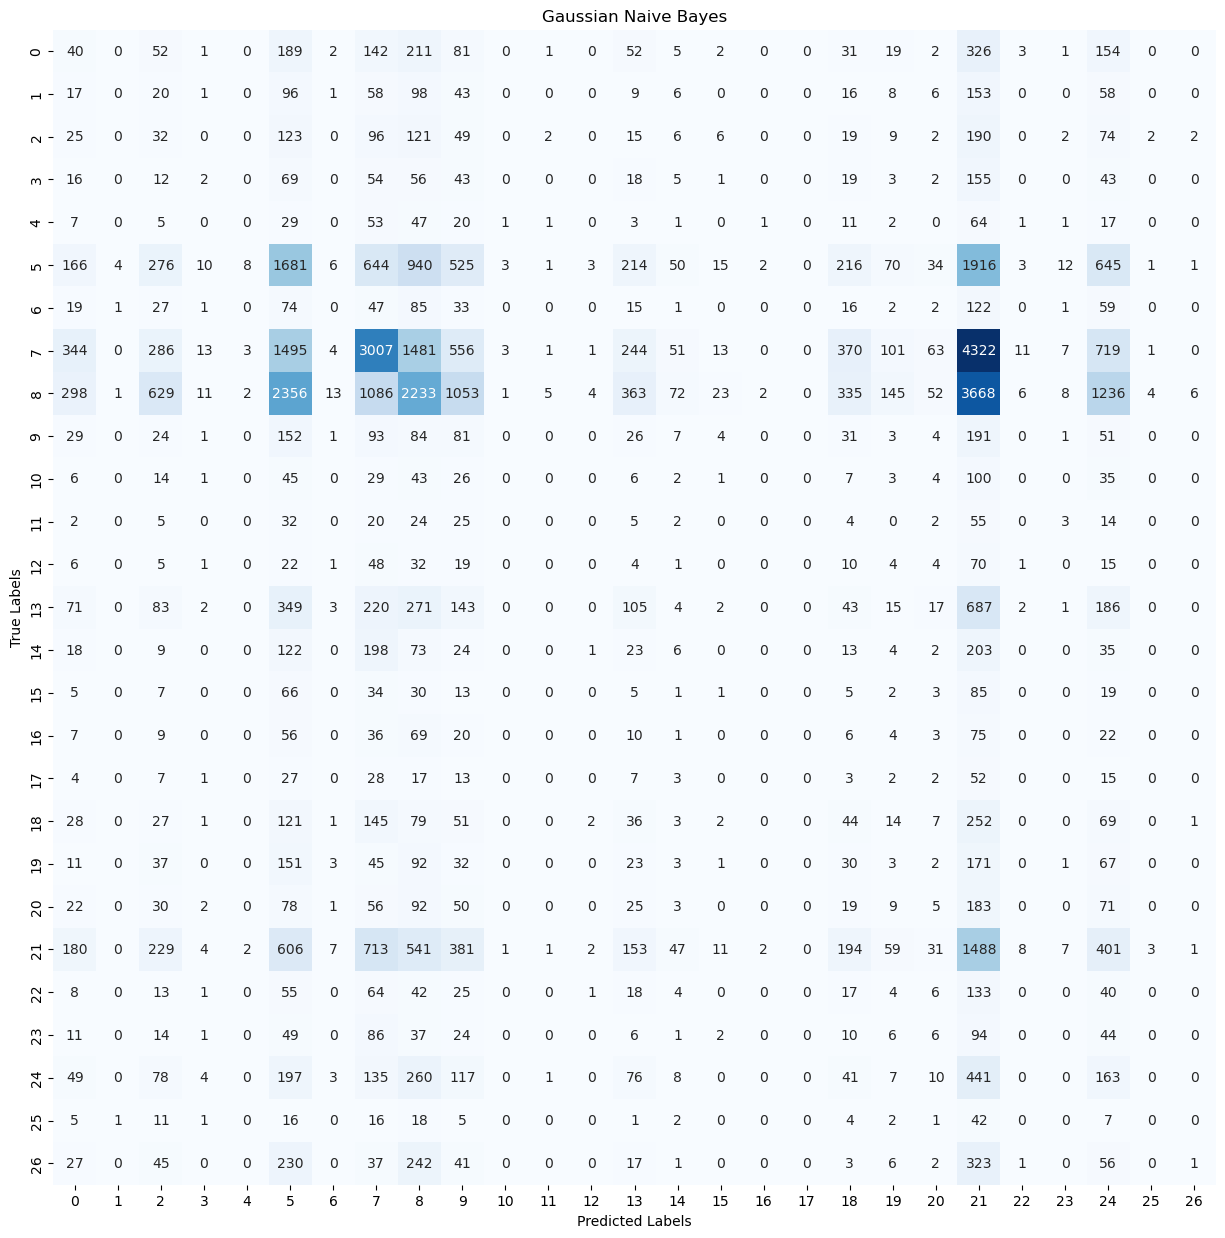

In [15]:
confusion = confusion_matrix(y_test, y_pred_gnb)

plt.figure(figsize=(15, 15))
sb.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gaussian Naive Bayes')

plt.show()


# Multinomial Naive Bayes

In [16]:
%%time

mnb_model = MultinomialNB()
mnb_model.fit(x_train, y_train)

CPU times: total: 8.23 s
Wall time: 11.4 s


MultinomialNB()

In [17]:
%%time

y_pred_mnb = mnb_model.predict(x_test)
len(y_pred_mnb)

CPU times: total: 4.09 s
Wall time: 20.7 s


54200

In [18]:
accuracy = accuracy_score(y_test, y_pred_mnb)
accuracy

0.33092250922509225

In [19]:
print(classification_report(y_test, y_pred_mnb, zero_division=1))

              precision    recall  f1-score   support

           0       0.11      0.03      0.05      1314
           1       0.13      0.06      0.08       590
           2       0.06      0.04      0.05       775
           3       0.02      0.01      0.02       498
           4       0.02      0.01      0.01       264
           5       0.29      0.21      0.24      7446
           6       0.03      0.02      0.03       505
           7       0.42      0.63      0.50     13096
           8       0.39      0.49      0.43     13612
           9       0.04      0.03      0.04       783
          10       0.03      0.01      0.01       322
          11       0.29      0.08      0.13       193
          12       0.01      0.00      0.01       243
          13       0.15      0.04      0.06      2204
          14       0.19      0.11      0.14       731
          15       0.02      0.04      0.03       276
          16       0.05      0.02      0.03       318
          17       0.00    

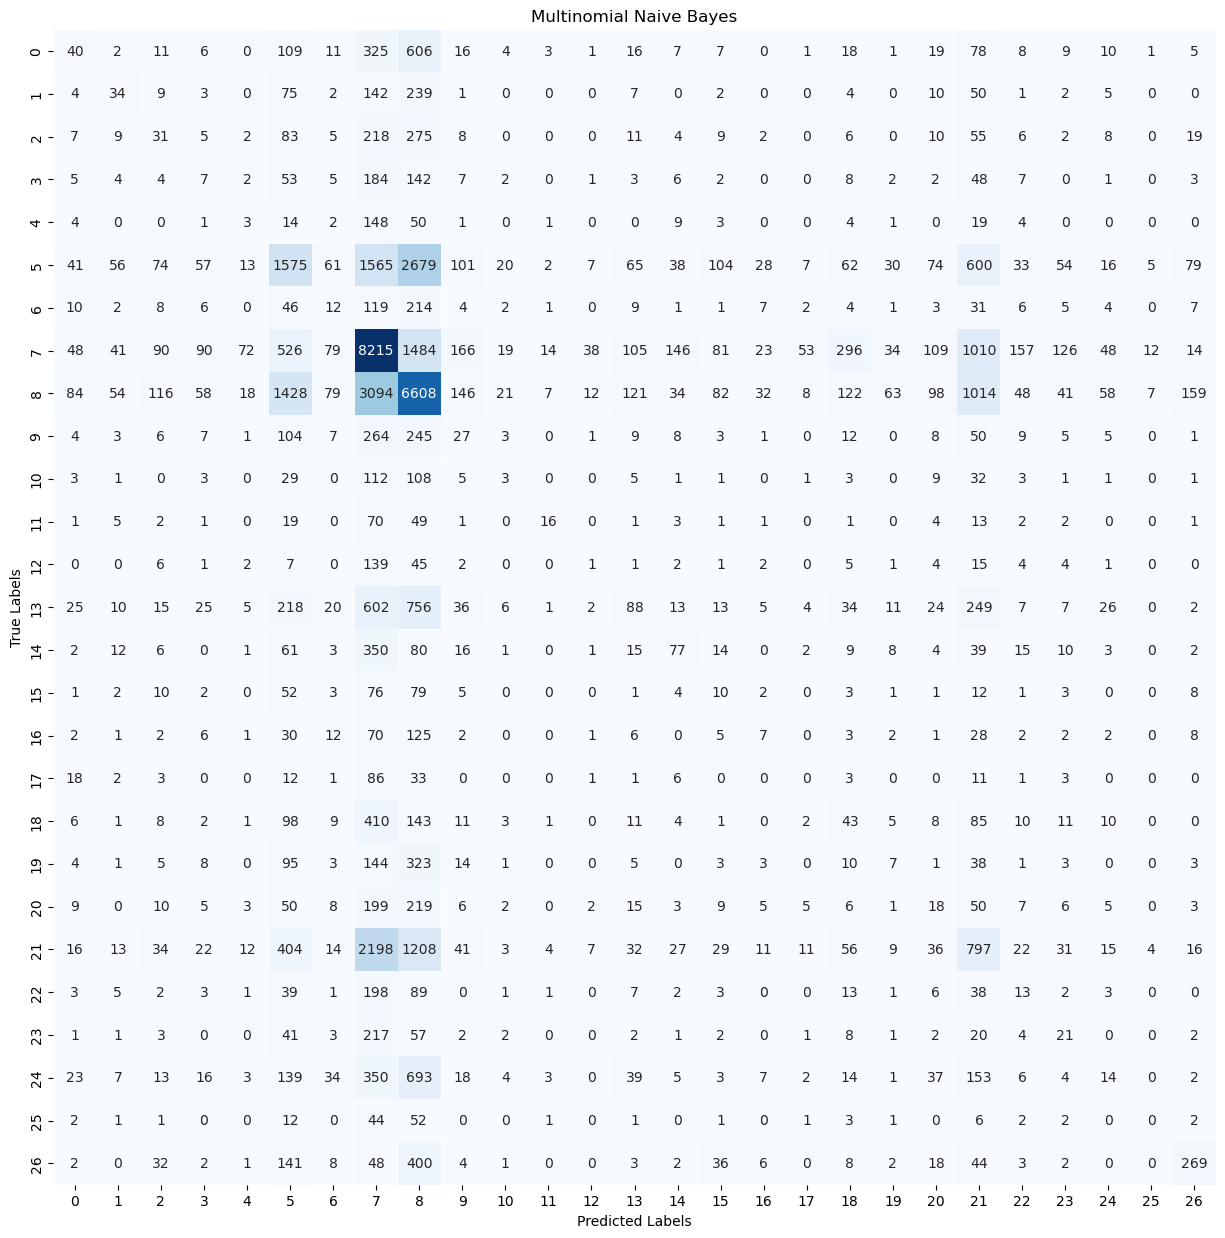

In [20]:
confusion = confusion_matrix(y_test, y_pred_mnb)

plt.figure(figsize=(15, 15))
sb.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Multinomial Naive Bayes')

plt.show()

# Logistic Regression

In [21]:
%%time

log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)

CPU times: total: 11min 26s
Wall time: 6min 8s


LogisticRegression(max_iter=1000)

In [22]:
%%time

y_pred_log = log_model.predict(x_test)
len(y_pred_log)

CPU times: total: 4.56 s
Wall time: 21.7 s


54200

In [23]:
accuracy = accuracy_score(y_test, y_pred_log)
accuracy

0.3570848708487085

In [24]:
print(classification_report(y_test, y_pred_log, zero_division=1))

              precision    recall  f1-score   support

           0       0.21      0.01      0.01      1314
           1       0.30      0.02      0.04       590
           2       0.08      0.00      0.01       775
           3       0.00      0.00      0.00       498
           4       1.00      0.00      0.00       264
           5       0.29      0.36      0.32      7446
           6       0.09      0.00      0.00       505
           7       0.53      0.56      0.54     13096
           8       0.38      0.53      0.44     13612
           9       0.00      0.00      0.00       783
          10       1.00      0.00      0.00       322
          11       1.00      0.01      0.01       193
          12       1.00      0.00      0.00       243
          13       0.20      0.05      0.08      2204
          14       0.35      0.02      0.03       731
          15       0.00      0.00      0.00       276
          16       1.00      0.00      0.00       318
          17       0.00    

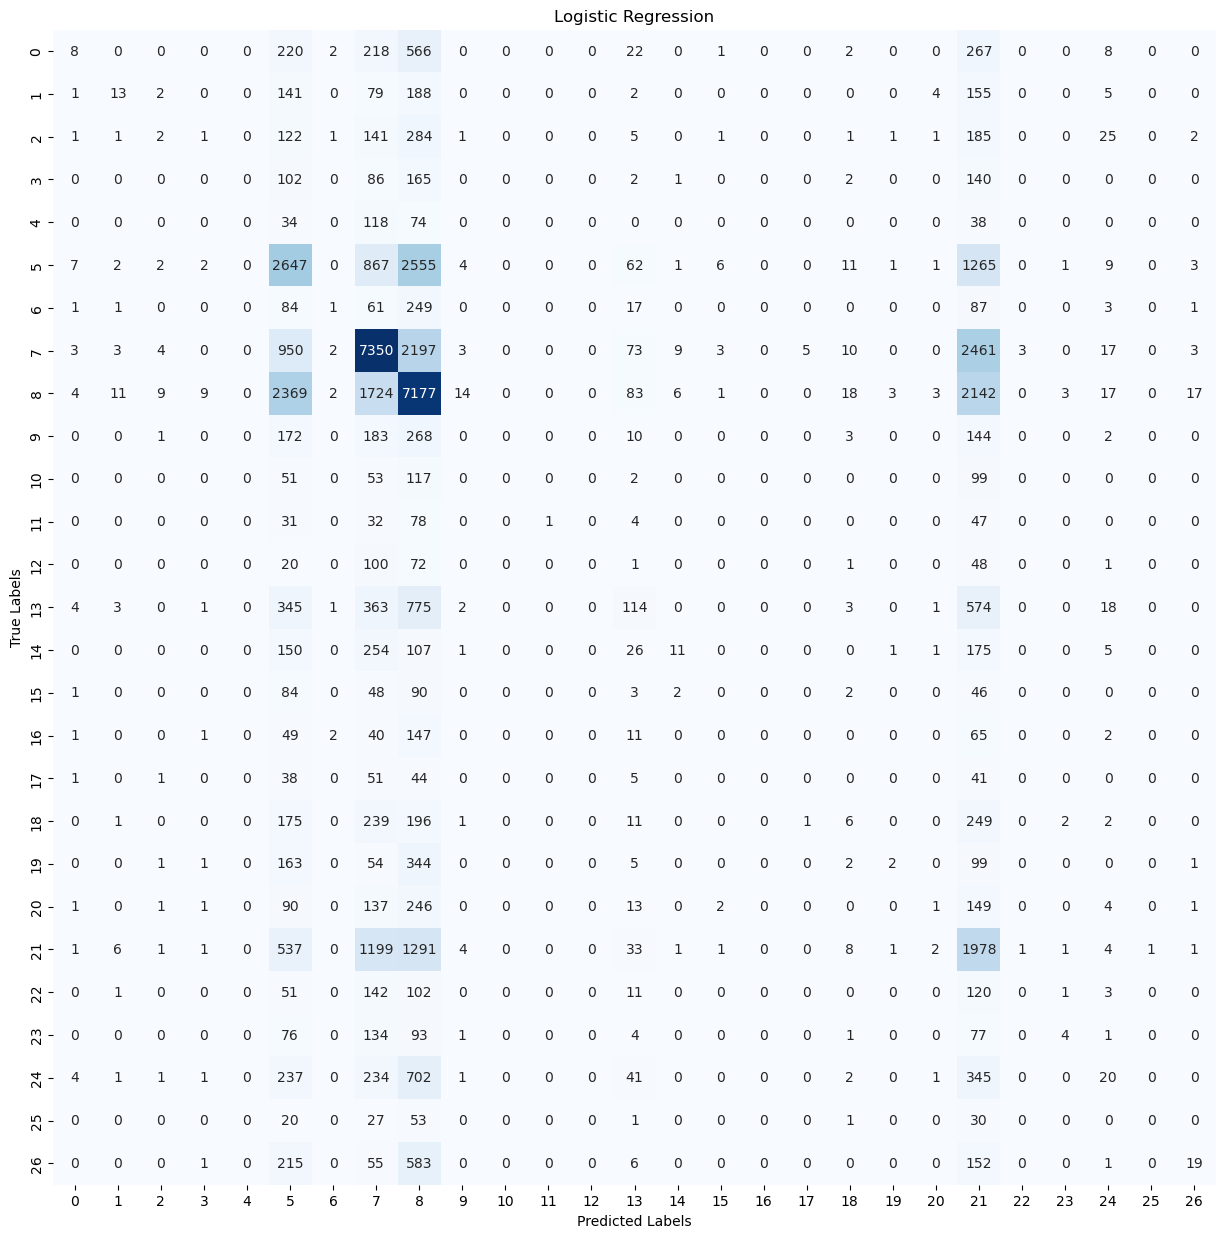

In [25]:
confusion = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(15, 15))
sb.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression')

plt.show()

# K Nearest Neighbours

In [26]:
%%time

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

CPU times: total: 3.5 s
Wall time: 7.42 s


KNeighborsClassifier()

In [27]:
%%time

y_pred_knn = knn_model.predict(x_test)
len(y_pred_knn)

CPU times: total: 32min 34s
Wall time: 9min 48s


54200

In [28]:
accuracy = accuracy_score(y_test, y_pred_knn)
accuracy

0.22474169741697417

In [29]:
print(classification_report(y_test, y_pred_knn, zero_division=1))

              precision    recall  f1-score   support

           0       0.03      0.08      0.04      1314
           1       0.06      0.04      0.05       590
           2       0.02      0.03      0.02       775
           3       0.02      0.03      0.02       498
           4       0.01      0.01      0.01       264
           5       0.16      0.22      0.19      7446
           6       0.02      0.02      0.02       505
           7       0.32      0.28      0.30     13096
           8       0.30      0.44      0.36     13612
           9       0.04      0.01      0.02       783
          10       0.02      0.00      0.01       322
          11       0.38      0.02      0.03       193
          12       0.20      0.00      0.01       243
          13       0.05      0.03      0.04      2204
          14       0.06      0.01      0.02       731
          15       0.00      0.00      0.00       276
          16       0.00      0.00      0.00       318
          17       0.00    

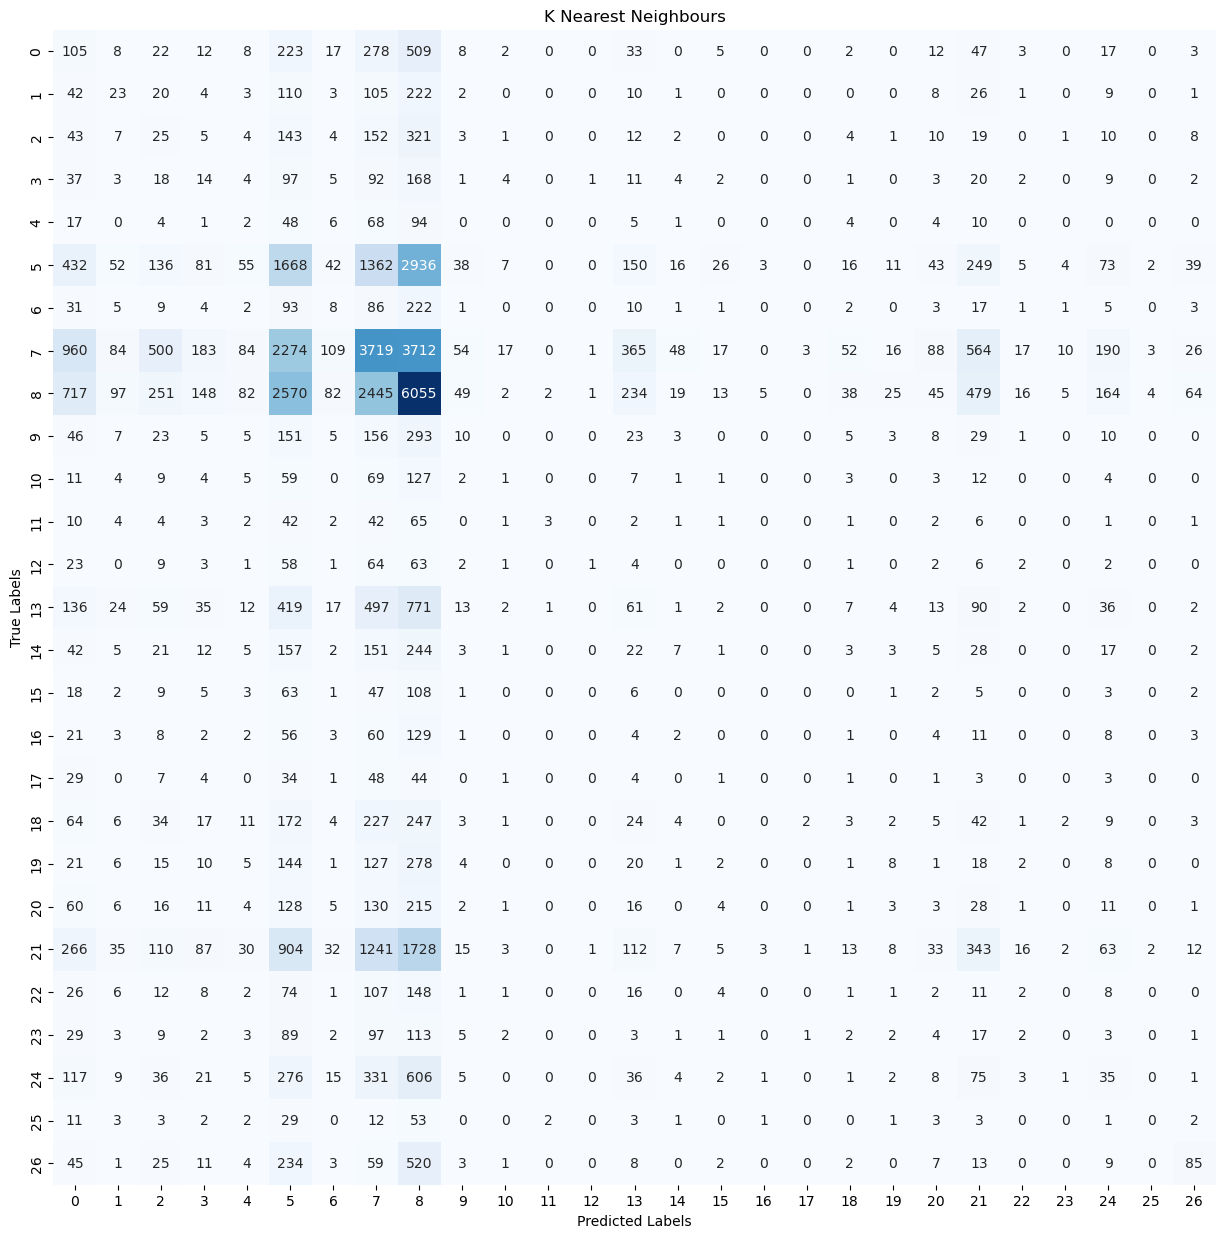

In [30]:
confusion = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(15, 15))
sb.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('K Nearest Neighbours')

plt.show()

# Support Vector Machine

In [31]:
%%time

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr')
svm_model.fit(x_train, y_train)

CPU times: total: 5h 50min 3s
Wall time: 5h 52min 58s


SVC()

In [32]:
%%time

y_pred_svm = svm_model.predict(x_test)
len(y_pred_svm)

CPU times: total: 3h 45min
Wall time: 3h 52min 2s


54200

In [33]:
accuracy = accuracy_score(y_test, y_pred_svm)
accuracy

0.3611439114391144

In [34]:
print(classification_report(y_test, y_pred_svm, zero_division=1))

              precision    recall  f1-score   support

           0       0.25      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       1.00      0.00      0.00       498
           4       1.00      0.00      0.00       264
           5       0.26      0.39      0.31      7446
           6       1.00      0.00      0.00       505
           7       0.53      0.56      0.55     13096
           8       0.37      0.56      0.45     13612
           9       1.00      0.00      0.00       783
          10       1.00      0.00      0.00       322
          11       1.00      0.00      0.00       193
          12       1.00      0.00      0.00       243
          13       0.18      0.01      0.03      2204
          14       0.25      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16       1.00      0.00      0.00       318
          17       0.00    

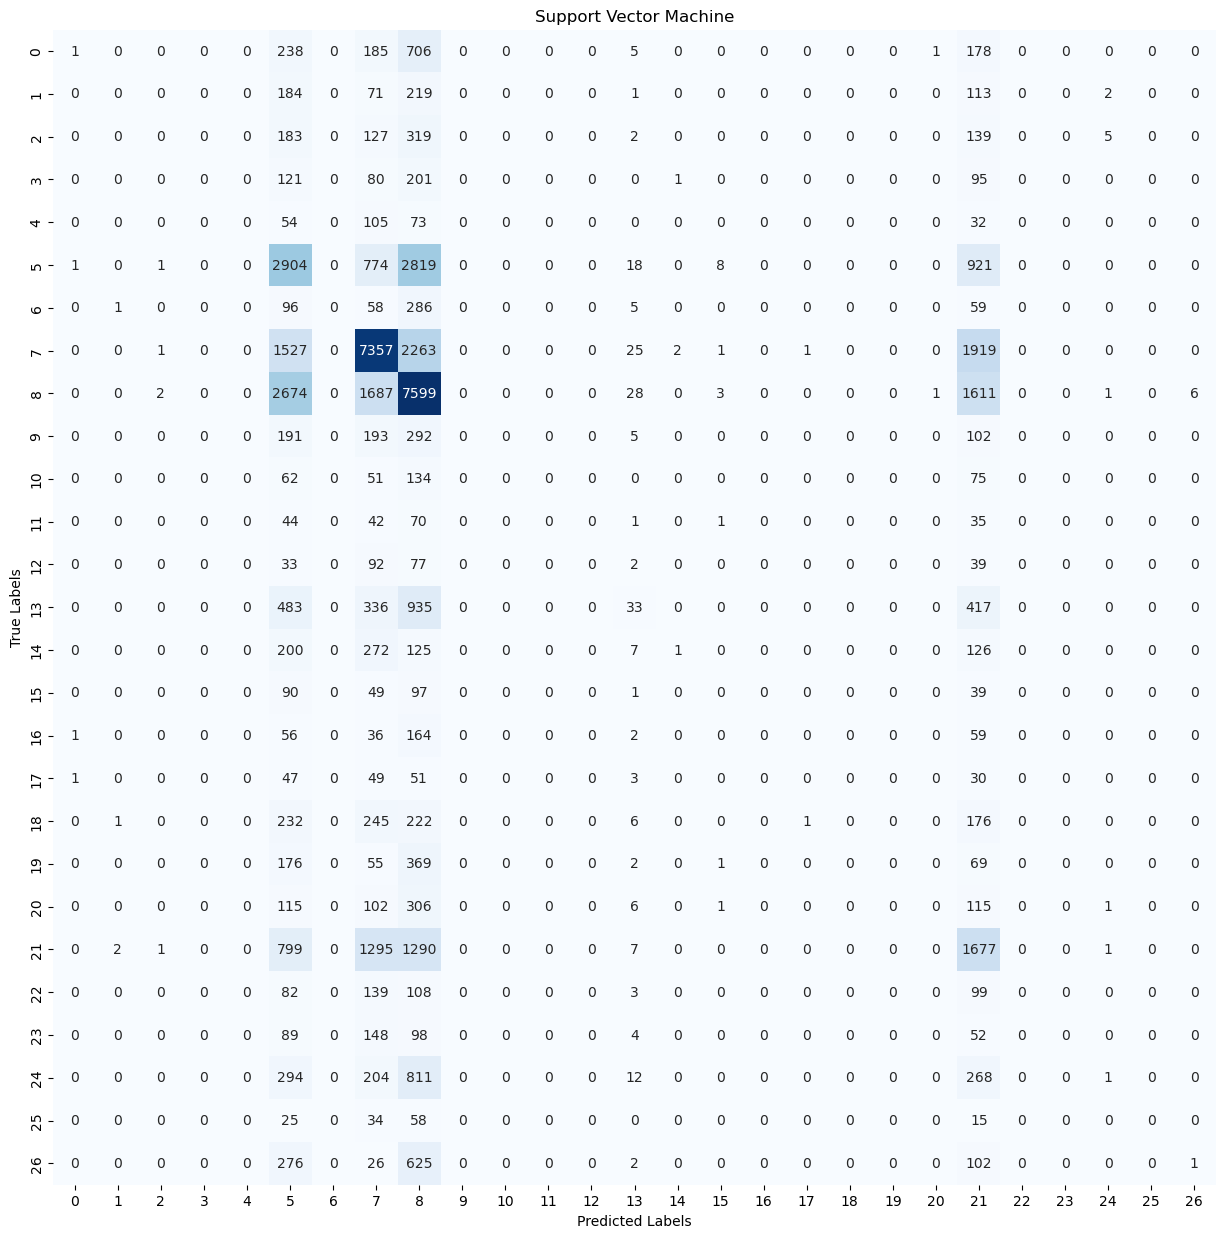

In [35]:
confusion = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(15, 15))
sb.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Support Vector Machine')

plt.show()

# Random Forest


In [36]:
%%time

rf_model = RandomForestClassifier(n_estimators= 100, criterion="entropy")
rf_model.fit(x_train, y_train)

CPU times: total: 4min 32s
Wall time: 4min 53s


RandomForestClassifier(criterion='entropy')

In [37]:
%%time

y_pred_rf = svm_model.predict(x_test)
len(y_pred_rf)

CPU times: total: 3h 51min 9s
Wall time: 4h 1min 59s


54200

In [38]:
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.3611439114391144

In [39]:
print(classification_report(y_test, y_pred_rf, zero_division=1))

              precision    recall  f1-score   support

           0       0.25      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       1.00      0.00      0.00       498
           4       1.00      0.00      0.00       264
           5       0.26      0.39      0.31      7446
           6       1.00      0.00      0.00       505
           7       0.53      0.56      0.55     13096
           8       0.37      0.56      0.45     13612
           9       1.00      0.00      0.00       783
          10       1.00      0.00      0.00       322
          11       1.00      0.00      0.00       193
          12       1.00      0.00      0.00       243
          13       0.18      0.01      0.03      2204
          14       0.25      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16       1.00      0.00      0.00       318
          17       0.00    

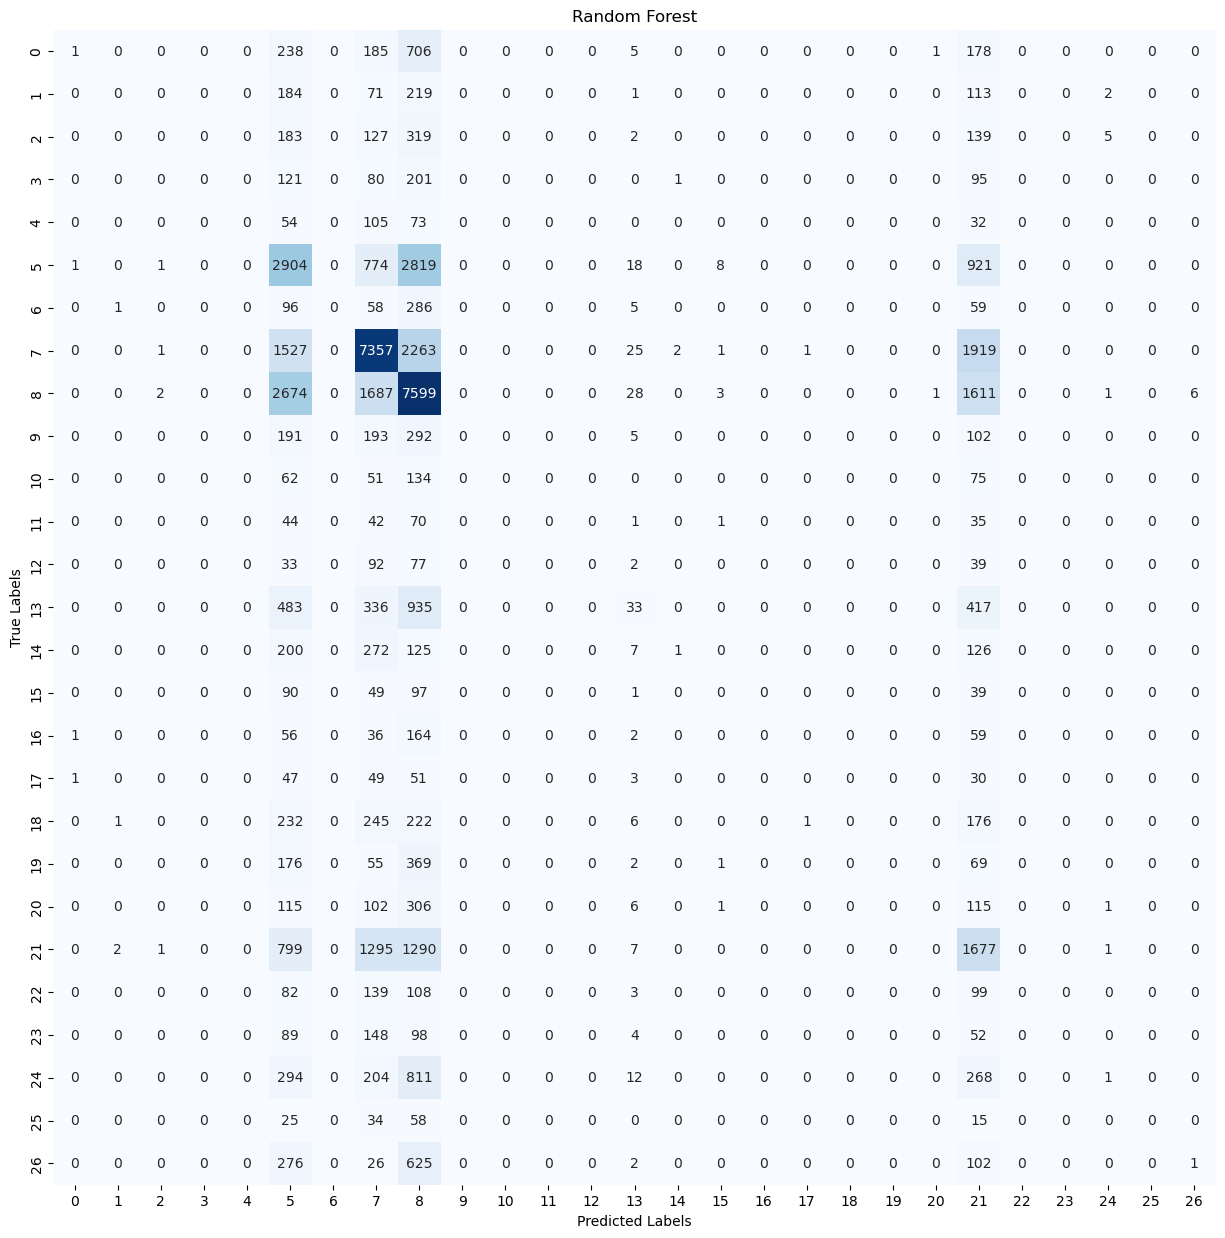

In [40]:
confusion = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(15, 15))
sb.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest')

plt.show()

# Save models to external files

In [47]:
joblib.dump(gnb_model, "gnb_model.pkl")

['gnb_model.pkl']

In [49]:
joblib.dump(mnb_model, "mnb_model.pkl")

['mnb_model.pkl']

In [50]:
joblib.dump(log_model, "log_model.pkl")

['log_model.pkl']

In [51]:
joblib.dump(knn_model, "knn_model.pkl")

['knn_model.pkl']

In [52]:
joblib.dump(svm_model, "svm_model.pkl")

['svm_model.pkl']

In [53]:
joblib.dump(rf_model, "rf_model.pkl")

['rf_model.pkl']